**Mid term paper**

In [21]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep 14 2021, 01:11:01) [MSC v.1916 64 bit (AMD64)]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


We will continue to practice EDA and splitting/preprocessing in this problem set.

**Problem 1a, diabetes EDA** (10 points)

We will work with the diabetes dataset in this problem set. Please carefully read the description [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) and [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Read the data into a pandas dataframe using the txt file linked [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Perform EDA by going through Q1-4 from PS3 2a. Prepare two additional visualizations using column pairs. The two figures should be different types but one of the columns should be the target variable.

In [22]:
#read dataset
import pandas as pd
import numpy as np
dataset = pd.read_csv('C:/Users/josh/DATA1030-Fall2021/mid-term/Insurance.csv')

In [23]:
# show dataset 
dataset.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [25]:
# clasification of feasures and target variable
# categorical 
onehot_ftrs = [ "Gender","Driving_License", 'Region_Code','Policy_Sales_Channel', 'Previously_Insured',  'Vehicle_Damage', 'Vehicle_Age']

# continuous
minmax_ftrs = ["Age"]
stand_ftrs = ["Annual_Premium","Vintage"]

# target
target = ['response']

In [26]:
# number of columns and rows
print("The number of columns and rows")
print("The number of row :     ", len(dataset.index))
print("The number of columns :   ", len(dataset.columns))

The number of columns and rows
The number of row :      381109
The number of columns :    12


In [27]:
# Missing data check
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [28]:
# the number of unique values per each feature
for i in dataset.columns:
    print(i, "    " ,dataset[i].nunique())

id      381109
Gender      2
Age      66
Driving_License      2
Region_Code      53
Previously_Insured      2
Vehicle_Age      3
Vehicle_Damage      2
Annual_Premium      48838
Policy_Sales_Channel      155
Vintage      290
Response      2


In [29]:
#EDA
# data type
pd.set_option('display.max_rows', None)
print()
print("The type of data")
print(dataset.dtypes)


The type of data
id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object


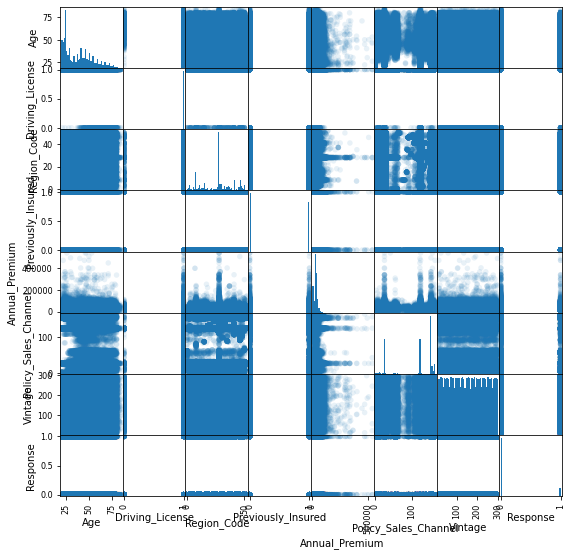

<Figure size 432x288 with 0 Axes>

In [59]:
df=dataset.iloc[:, 1:12]
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("target_histogram.png", dpi=300)

In [30]:
# target variable
print(dataset['Response'].describe())

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64


0    334399
1     46710
Name: Response, dtype: int64


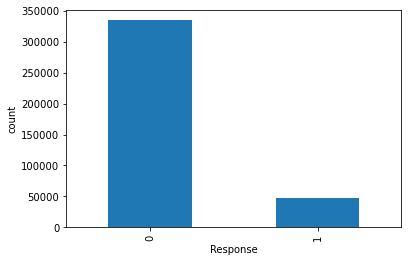

<Figure size 432x288 with 0 Axes>

In [38]:
# target variable's bar chart
import matplotlib
from matplotlib import pylab as plt

print(dataset['Response'].value_counts())
pd.value_counts(dataset['Response']).plot.bar()
plt.ylabel('count')
plt.xlabel('Response')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("target_histogram.png", dpi=300)

count     381109
unique         2
top         Male
freq      206089
Name: Gender, dtype: object
Male      206089
Female    175020
Name: Gender, dtype: int64


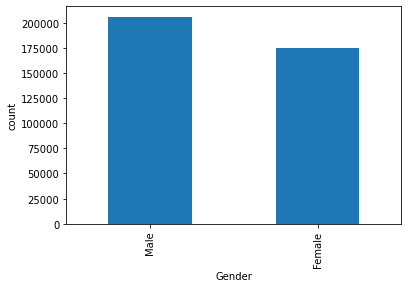

<Figure size 432x288 with 0 Axes>

In [40]:
# categorical data visualization

# Gender
print(dataset['Gender'].describe())
print(dataset['Gender'].value_counts())
pd.value_counts(dataset['Gender']).plot.bar()
plt.ylabel('count')
plt.xlabel('Gender') 
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("gender.png", dpi=300)

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64
1    380297
0       812
Name: Driving_License, dtype: int64


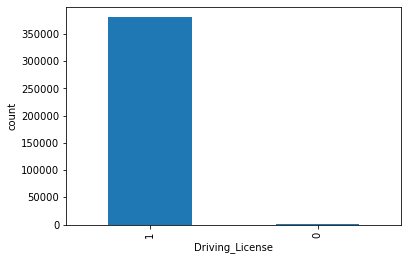

<Figure size 432x288 with 0 Axes>

In [39]:
# Driver License
print(dataset['Driving_License'].describe())
print(dataset['Driving_License'].value_counts())
pd.value_counts(dataset['Driving_License']).plot.bar()
plt.ylabel('count')
plt.xlabel('Driving_License')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("gender.png", dpi=300)

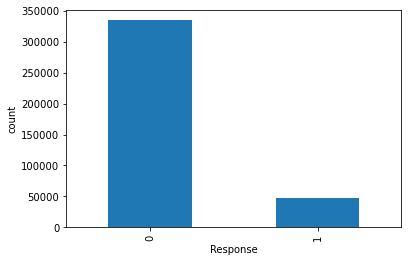

<Figure size 432x288 with 0 Axes>

In [34]:
pd.value_counts(dataset['Response']).plot.bar()
plt.ylabel('count')
plt.xlabel('Response')
plt.show()
plt.savefig("target_histogram.png", dpi=300)

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64
28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
31      1960
23      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: Region_Code, dtype: int64


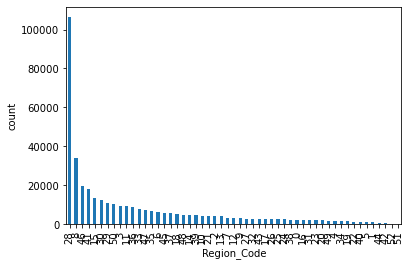

<Figure size 432x288 with 0 Axes>

In [41]:
print(dataset['Region_Code'].describe())
print(dataset['Region_Code'].value_counts())
pd.value_counts(dataset['Region_Code']).plot.bar()
plt.ylabel('count')
plt.xlabel('Region_Code')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
125      1026
15        888
29        843
12        783
120       769
24        750
31        631
14        622
153       607
61        579
3         523
16        523
60        517
4         509
158       492
23        422
22        332
150       312
10        264
19        222
136       185
147       184
109       175
145       174
9         169
18        167
91        158
116       154
37        152
21        148
139       143
128       137
42        132
59        127
138       124
131       121
127       110
140       107
113       104
119       103
44        101
135       101
54        100
64         89
133        85
148        77
35         75
103        72
111        68
56         65
121        64
47    

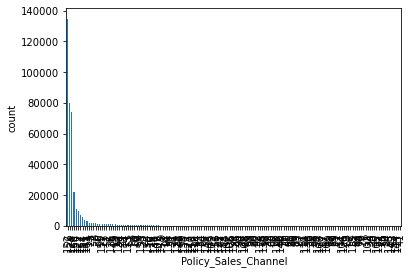

<Figure size 432x288 with 0 Axes>

In [42]:
print(dataset['Policy_Sales_Channel'].value_counts())
pd.value_counts(dataset['Policy_Sales_Channel']).plot.bar()
plt.ylabel('count')
plt.xlabel('Policy_Sales_Channel')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)


0    206481
1    174628
Name: Previously_Insured, dtype: int64


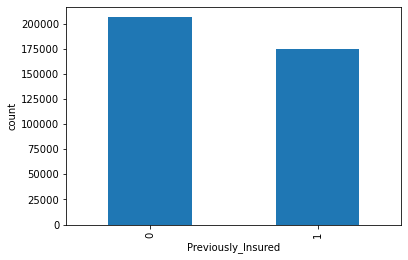

<Figure size 432x288 with 0 Axes>

In [43]:
print(dataset['Previously_Insured'].value_counts())
pd.value_counts(dataset['Previously_Insured']).plot.bar()
plt.ylabel('count')
plt.xlabel('Previously_Insured')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


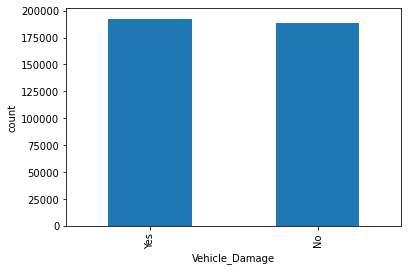

<Figure size 432x288 with 0 Axes>

In [44]:
print(dataset['Vehicle_Damage'].value_counts())
pd.value_counts(dataset['Vehicle_Damage']).plot.bar()
plt.ylabel('count')
plt.xlabel('Vehicle_Damage')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


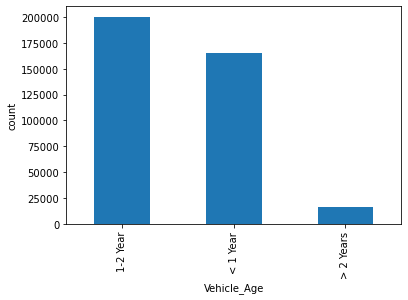

<Figure size 432x288 with 0 Axes>

In [45]:

print(dataset["Vehicle_Age"].value_counts())
pd.value_counts(dataset["Vehicle_Age"]).plot.bar()
plt.ylabel('count')
plt.xlabel("Vehicle_Age")
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64
24    25960
23    24256
22    20964
25    20636
21    16457
26    13535
27    10760
28     8974
43     8437
44     8357
45     8183
42     8007
46     7879
41     7736
29     7429
47     7351
40     7168
48     7113
49     6615
39     6460
50     6263
30     6258
20     6232
51     5915
38     5710
52     5590
31     5512
37     5408
53     5331
36     5066
33     5010
32     4998
54     4997
35     4936
34     4895
55     4495
56     4063
57     3944
58     3822
59     3614
60     3534
61     3341
62     3104
63     3084
64     2850
65     2791
66     2725
67     2624
69     2530
68     2440
70     2349
71     2051
72     2035
73     1925
74     1832
75     1605
76     1396
77     1388
78     1216
79      915
80      909
81       56
82       29
83       22
84       11
85       1

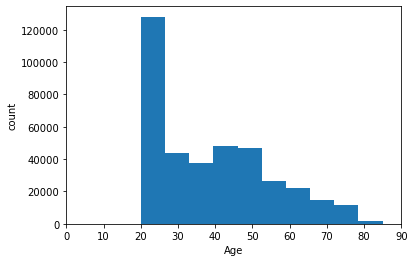

<Figure size 432x288 with 0 Axes>

In [46]:
# continuous data visualization
print(dataset['Age'].describe())
print(dataset["Age"].value_counts())
dataset['Age'].plot.hist(bins=10)
plt.xticks(np.arange(0,100,10))
plt.xlabel('Age')
plt.ylabel('count')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

In [19]:
print(dataset['Annual_Premium'].describe())
print(dataset["Annual_Premium"].value_counts())

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64
2630      64877
69856       140
39008        41
38287        38
45179        38
          ...  
14838         1
52535         1
15182         1
143525        1
69845         1
Name: Annual_Premium, Length: 48838, dtype: int64


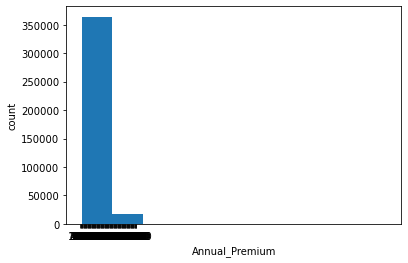

<Figure size 432x288 with 0 Axes>

In [47]:
dataset["Annual_Premium"].plot.hist(bins=10)
plt.xticks(np.arange(0,100000,1000))
plt.xlabel("Annual_Premium")
plt.ylabel('count')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

In [60]:
print(dataset["Vintage"].value_counts())

256    1418
73     1410
282    1397
158    1394
187    1392
31     1388
226    1388
160    1388
245    1387
131    1387
126    1386
232    1386
298    1384
103    1383
191    1383
215    1382
27     1382
24     1379
65     1379
54     1378
130    1376
197    1375
63     1375
37     1373
42     1372
249    1370
74     1368
284    1367
34     1366
117    1366
76     1365
80     1364
228    1364
263    1364
292    1363
110    1362
92     1362
165    1361
248    1361
195    1360
83     1359
77     1358
241    1358
113    1357
250    1357
56     1357
144    1356
219    1356
200    1355
84     1354
102    1352
90     1352
94     1351
222    1351
147    1350
193    1349
257    1348
173    1348
270    1348
194    1347
151    1346
189    1346
288    1345
11     1344
40     1343
254    1343
251    1343
115    1343
30     1343
227    1342
71     1342
95     1342
230    1342
105    1341
186    1340
49     1340
106    1340
33     1339
216    1339
135    1339
242    1339
268    1338
272    1338
280 

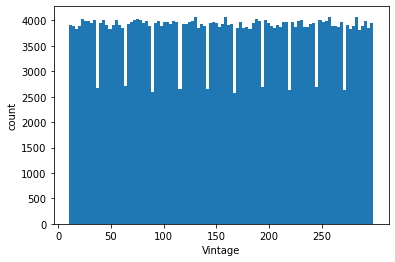

<Figure size 432x288 with 0 Axes>

In [48]:
dataset["Vintage"].plot.hist(bins=100)
plt.xticks(np.arange(0,300,50))
plt.xlabel("Vintage")
plt.ylabel('count')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

Response       0      1
Gender                 
Female    156835  18185
Male      177564  28525
*****************************************************************
Response         0         1
Gender                      
Female    0.896098  0.103902
Male      0.861589  0.138411


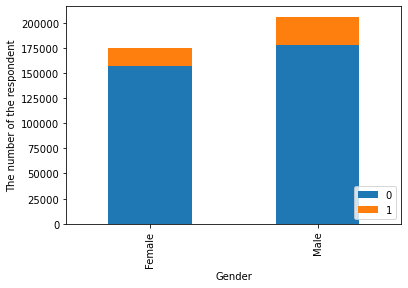

<Figure size 432x288 with 0 Axes>

In [49]:
# Visualization between Target variable and Categorical variable 
count_matrix = dataset.groupby(['Gender', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)


Response              0      1
Driving_License               
0                   771     41
1                333628  46669
*****************************************************************
Response                0         1
Driving_License                    
0                0.949507  0.050493
1                0.877283  0.122717


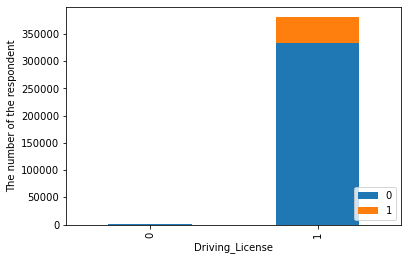

<Figure size 432x288 with 0 Axes>

In [50]:
count_matrix = dataset.groupby(['Driving_License', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

Response         0      1
Region_Code              
0             1847    174
1              899    109
2             3751    287
3             8070   1181
4             1516    285
5             1131    148
6             5841    439
7             2847    432
8            30620   3257
9             2848    253
10            4111    263
11            8191   1041
12            2886    312
13            3672    364
14            4256    422
15           12350    958
16            1873    134
17            2433    184
18            4475    678
19            1285    250
20            1712    223
21            3963    303
22            1226     83
23            1660    300
24            2073    342
25            2396    107
26            2400    187
27            2614    209
28           86498  19917
29            9700   1365
30           11291    900
31            1763    197
32            2548    239
33            6894    760
34            1538    126
35            6077    865
36          

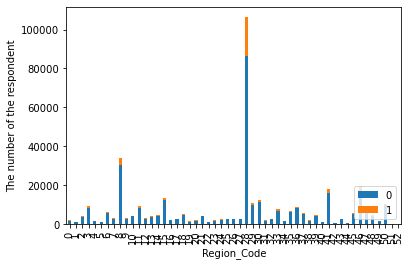

<Figure size 432x288 with 0 Axes>

In [51]:
count_matrix = dataset.groupby([ 'Region_Code', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

Response                     0        1
Policy_Sales_Channel                   
1                       1039.0     35.0
2                          3.0      1.0
3                        364.0    159.0
4                        407.0    102.0
6                          3.0      NaN
7                       1416.0    182.0
8                       1390.0    125.0
9                        152.0     17.0
10                       214.0     50.0
11                      1095.0    108.0
12                       651.0    132.0
13                      1590.0    275.0
14                       559.0     63.0
15                       810.0     78.0
16                       478.0     45.0
17                        13.0      3.0
18                       161.0      6.0
19                       203.0     19.0
20                        24.0      3.0
21                       136.0     12.0
22                       314.0     18.0
23                       364.0     58.0
24                       651.0     99.0


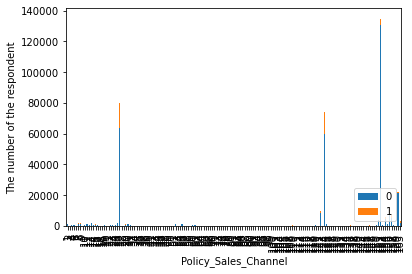

In [86]:
count_matrix = dataset.groupby([ 'Policy_Sales_Channel', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.show()

Response                 0      1
Previously_Insured               
0                   159929  46552
1                   174470    158
*****************************************************************
Response                   0         1
Previously_Insured                    
0                   0.774546  0.225454
1                   0.999095  0.000905


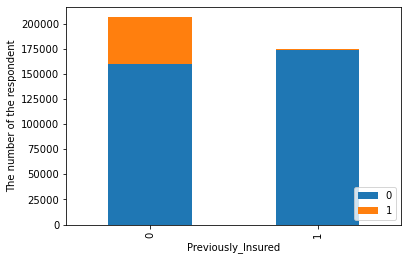

<Figure size 432x288 with 0 Axes>

In [52]:
count_matrix = dataset.groupby([ 'Previously_Insured', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

Response             0      1
Vehicle_Damage               
No              187714    982
Yes             146685  45728
*****************************************************************
Response               0         1
Vehicle_Damage                    
No              0.994796  0.005204
Yes             0.762345  0.237655


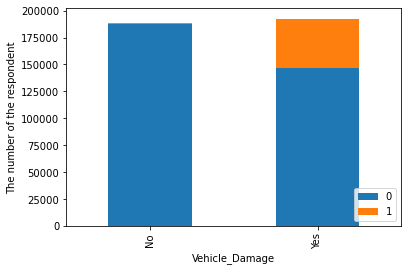

<Figure size 432x288 with 0 Axes>

In [53]:
count_matrix = dataset.groupby([ 'Vehicle_Damage', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

Response          0      1
Vehicle_Age               
1-2 Year     165510  34806
< 1 Year     157584   7202
> 2 Years     11305   4702
*****************************************************************
Response            0         1
Vehicle_Age                    
1-2 Year     0.826245  0.173755
< 1 Year     0.956295  0.043705
> 2 Years    0.706254  0.293746


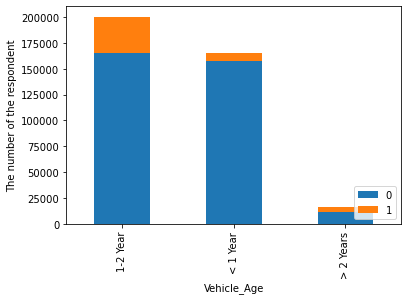

<Figure size 432x288 with 0 Axes>

In [54]:
count_matrix = dataset.groupby([ 'Vehicle_Age', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

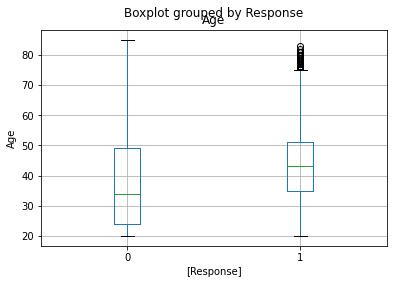

<Figure size 432x288 with 0 Axes>

In [55]:
# Visualization between Target variable and Contiuous variable

dataset[['Age','Response']].boxplot(by='Response')
plt.ylabel('Age')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)


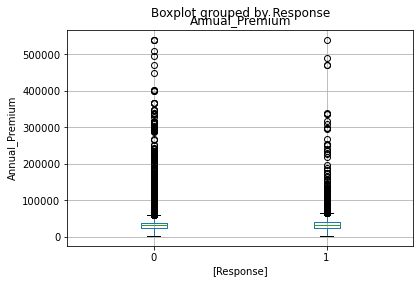

<Figure size 432x288 with 0 Axes>

In [56]:
dataset[['Annual_Premium','Response']].boxplot(by='Response')
plt.ylabel('Annual_Premium')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)


cat_non_ord_data = ["id", "gender","Driving_License", 'Region_Code','Policy_Sales_Channel', 'Previously_Insured',  'Vehicle_Damage', 'Vehicle_Age']
con_minmax_data = ["Age"]
con_stand_data = ["Annual_Premium","Vintage"]

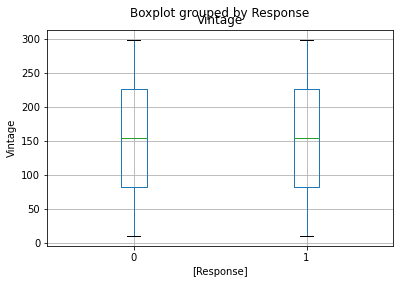

<Figure size 432x288 with 0 Axes>

In [57]:
dataset[['Vintage','Response']].boxplot(by='Response')
plt.ylabel('Vintage')
plt.savefig('test.png', dpi=300) 
plt.show()
plt.savefig("tt.png", dpi=300)

In [60]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold

y = dataset.iloc[:, 11:12] # target variable 
X = dataset.iloc[:, 1:11] # features

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=32)

for i in range(10) :
    X_other, X_test, y_other, y_test = train_test_split(X, y, train_size=0.6, stratify=y,random_state=31)
    
    new_data = {"train" :[ ], "validaiton" :[ ], "test" : [ ]}
    new_data["test"] = [X_test, y_test]
    
    # split train and validation set with kfold when the data is unvalanced. 
    
    for train, val in kf.split(X_other, y_other) :
        X_train = X_other.iloc[train]
        y_train = y_other.iloc[train]
        X_val = X_other.iloc[val]
        y_val = y_other.iloc[val] 
    
   

In [61]:
len(X_test.columns)

10